In [11]:
""" polynomial_regression.py """
import numpy as np
from numpy.linalg import norm , solve
import matplotlib.pyplot as plt
from numpy.random import rand , randn

Importing necessary libraries:
- numpy: Used for numerical operations.
- numpy.linalg.norm: Computes the norm (length) of vectors.
- numpy.linalg.solve: Solves linear systems.
- matplotlib.pyplot: For plotting.
- numpy.random.rand, randn: For generating random numbers.

In [12]:
def generate_data(p, beta , sig, n):
   u = np.random.rand(n, 1)
   y = (u ** np.arange(0, p+1)) @ beta + sig * np.random.randn(n, 1)
   return u, y

Data Generation

Purpose: Generates synthetic data for polynomial regression.
- p: Degree of the polynomial.
- beta: True coefficients (should be a column vector of shape (p+1, 1)).
- sig: Standard deviation of the noise.
- n: Number of data points.

How it works:
- u: Random input features (uniformly in [0,1], shape (n, 1)).
- u ** np.arange(0, p+1): For each feature u, creates a column for each power from 0 to p (i.e., [1, u, u^2, ..., u^p]).
- @ beta: Multiplies by true coefficients to get noiseless target values.
- '+ sig * np.random.randn(n, 1): Adds Gaussian noise.

In [13]:
beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(3, beta , sig, n)

- Sets true coefficients, number of samples, and noise.
- Generates synthetic data.

In [14]:
def model_matrix(p, u):
   X = np.ones((n, 1))
   p_range = np.arange(0, p + 1)    
   for p_current in p_range:
      if p_current > 0:
         X = np.hstack((X, u**(p_current))) 
   return X

Model Matrix Construction

Purpose: Constructs the design matrix for polynomial regression.
- u: Input data (shape (n, 1)).
- n: (should be passed in or global, but here assumed global).
- X: Design matrix, starting with a column of all ones (intercept).
- For each degree p_current from 1 to p, appends a column of u**p_current.
- Result: X has columns [1, u, u^2, ..., u^p].

In [15]:
def train(X, y):
    betahat = solve(X.T @ X, X.T @ y)
    return betahat

Model Training (Fitting)

Purpose: Solves the normal equations to get the least squares estimate of the coefficients.
- X.T @ X: Gram matrix.
- X.T @ y: Projection of targets into feature space.
- solve(...): Solves for betahat in (X^T X) betahat = X^T y.

In [16]:
X, betahat = {},{}
ps = [1, 3, 15]
for p in ps:
    X[p] = model_matrix(p, u) 
    betahat[p] = train(X[p], y)

- Fits polynomials of degree 1, 3, and 15 to the data.

In [17]:
def test_coefficients(n, betahat, X, y):
    y_hat = X @ betahat
    loss = (norm(y - y_hat)**2/n)
    return loss

Loss Calculation

Purpose: Computes the mean squared error (MSE) of predictions.
- y_hat: Predictions.
- norm(y - y_hat)**2: Sum of squared errors.
- Divided by n for mean.

In [18]:
u_test, y_test = generate_data(3, beta, sig, n)
X_test = {}
training_loss = {}
test_loss = {}
for p in ps:
     X_test[p] = model_matrix(p, u_test)
     training_loss[p] = test_coefficients(n, betahat[p], X[p], y)
     test_loss[p] = test_coefficients(n, betahat[p], X_test[p], y_test)

- Evaluates training and test loss for each degree.


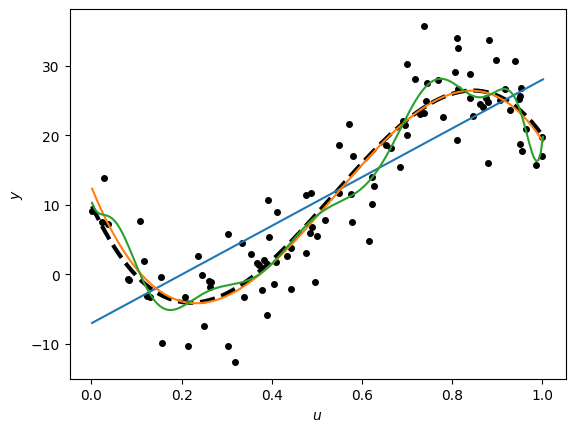

In [20]:
# Plot the points and true line and store in the list "plots"
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plots = [plt.plot(u, y, 'k.', markersize=8)[0], plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in ps:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
plt.show()

- Plots the true function, the data, and the fitted polynomials.